Author: Luca Pappalardo, Giovanni Mauro

Geospatial Analytics, Master degree in Data Science and Business Informatics, University of Pisa

# Geospatial Analytics - Lesson 2: Fundamental Concepts

In this lesson, we will learn how to handle spatial data in Python using Shapely, Geopandas, and scikit-mobility.

1. [Shapely](#shapely)
2. [Geopandas](#geopandas)
3. [Folium](#folium)
4. [scikit-mobility](#scikitmobility)

<a id='shapely'></a>
# Shapely

In [**Shapely**](https://shapely.readthedocs.io/en/stable/manual.html), the most fundamental geometric objects are `Point`, `Line` and `Polygon`, the basic ingredients when working with spatial data in vector data format. 

Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in `GeoPandas` and `scikit-mobility`.

Geometric objects consist of coordinate tuples where:

- `Point` represents a single point in space. Points can be either two-dimensional $(x, y)$ or three dimensional $(x, y, z)$

- `LineString` (i.e., a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples

- `Polygon` represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons

It is also possible to have a collection of geometric objects (e.g., `Polygon`s with multiple parts):

- `MultiPoint` object: represents a collection of `Point`s and consists of a list of coordinate-tuples

- `MultiLineString` object: represents a collection of `LineString`s and consists of a list of line-like sequences

- `MultiPolygon` object: represents a collection of `Polygon`s that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

### Point

In [2]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

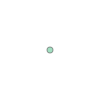

In [5]:
point1

In [8]:
print(point1)
point1.geom_type

POINT (2.2 4.2)


'Point'

In [11]:
print(list(point1.coords))
print(point1.x)
print(point1.y)

[(2.2, 4.2)]
2.2
4.2


In [12]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {round(dist, 2)} units")

Distance between the points is 29.72 units


### Line

In [14]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Check if lines are identical
line == line2 

True

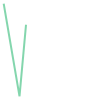

In [15]:
line

In [21]:
print(list(line.coords))
print(line.length)
print(line.centroid)
print(line.xy)
print(line.xy[0]) 
print(line.xy[1])

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
52.46106912939557
POINT (6.229961354035622 -11.892411157572392)
(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))
array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


### Polygon

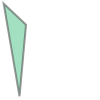

In [22]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

poly

In [23]:
poly.area

86.789

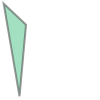

In [26]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
poly2

In [27]:
poly == poly2

True

In [28]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [29]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


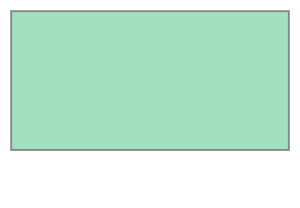

In [30]:
world

### Polygon attributes and functions¶
We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, bounding box (`bounds`), `exterior`, and exterior-length (`exterior.length`). 

Here, we can see a few of the available attributes and how to access them:

In [ ]:
# Print the outputs
print(f"Polygon centroid: {world.centroid}")
print(f"Polygon Area: {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.exterior.length}")

<a id="geometrycollections"></a>
## Geometry collections
In some occassions it is useful to store multiple geometries (e.g., several points or several polygons) in a single feature. For example, when country is composed of several islands, the polygons share the same attributes on the country-level and it might be reasonable to store that country as geometry collection that contains all the polygons. The attribute table would then contain one row of information with country-level attributes, and the geometry related to those attributes would represent several polygons.

In Shapely, collections of `Point`s are implemented by using a `MultiPoint` object, collections of `LineString`s by using a `MultiLineString` object, and collections of `Polygon`s by a `MultiPolygon` object.

In [31]:
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [32]:
point1, point2, point3 = (2.2, 4.2), (7.2, -25.1), (9.26, -2.456)
    
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# Print object definitions
print(multi_point)
print(multi_line)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


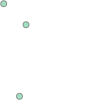

In [33]:
multi_point

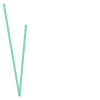

In [34]:
multi_line

`MultiPolygon`s are constructed in a similar manner. Let’s create a bounding box for “the world” by combining two separate polygons that represent the western and eastern hemispheres.

In [35]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Print object definition
print(west_poly)

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


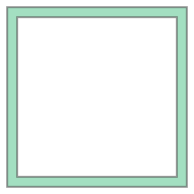

In [36]:
west_poly

Shapely also has a tool for creating a bounding box based on minimum and maximum $x$ and $y$ coordinates. Instead of using the `Polygon` constructor, let’s use the box constructor for creating the polygon:

In [37]:
from shapely.geometry import box

In [38]:
# Specify the bbox extent (lower-left corner coordinates and upper-right corner coordinates)
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Print object definition
print(east_poly)

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


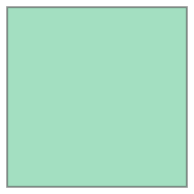

In [39]:
east_poly

Finally, we can combine the two polygons into a `MultiPolygon`:

In [40]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly])

# Print object definition
print(multi_poly)

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


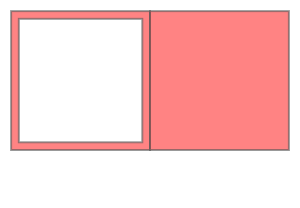

In [41]:
multi_poly

We can check if we have a "valid" `MultiPolygon`, i.e., if the individual polygons does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have a valid polygon. 

We can check the validity of an object from the `is_valid` attribute that tells if the polygons or lines intersect with each other. This can be really useful information when trying to find topological errors from your data:

In [42]:
print(f"Is polygon valid? {multi_poly.is_valid}")

Is polygon valid? False


<a id="geopandas"></a>
# Geopandas

[**Geopandas**](http://geopandas.org/) makes it possible to work with geospatial data in Python in a relatively easy way. Geopandas combines the capabilities of the data analysis library pandas with other packages like Shapely and fiona for managing spatial data.

The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrame`s from pandas. This means that we can use all our pandas skills also when working with geopandas!

The main difference between `GeoDataFrame`s and pandas `DataFrame`s is that a `GeoDataFrame` should contain one column for geometries. By default, the name of this column is `'geometry'`. The geometry column is a `GeoSeries` which contains the geometries (`Point`, `LineString`, `Polygon`) as shapely objects.

![](https://autogis-site.readthedocs.io/en/latest/_images/geodataframe.png)

In [43]:
import geopandas as gpd

/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


<a id="readingshapefile"></a>
## Reading a Shapefile

In [44]:
fp = "data/L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp"
# Read file using gpd.read_file()
data = gpd.read_file(fp)
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,None,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,None,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,None,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,None,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,None,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [45]:
type(data)

geopandas.geodataframe.GeoDataFrame

As you might guess, the column names are in Finnish. Let’s select only the useful columns and rename them into English:

In [49]:
data = data[['RYHMA', 'LUOKKA',  'geometry']]
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data.rename(columns=colnames, inplace=True)

data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


Here we see that our data variable is a `GeoDataFrame`. `GeoDataFrame` extends the functionalities of `pandas.DataFrame` in a way that it is possible to handle spatial data using similar approaches and datastructures as in pandas (hence the name geopandas).

It is always a good idea to explore your data also on a map. Creating a simple map from a GeoDataFrame is really easy: you can use `.plot()` function from geopandas that creates a map based on the geometries of the data. Geopandas actually uses matplotlib for plotting.

<Axes: >

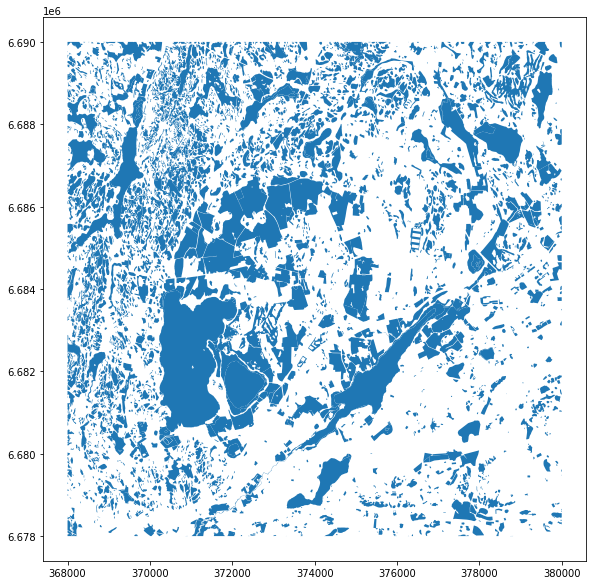

In [59]:
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)

<a id="geometriesgeopandas"></a>
## Geometries in Geopandas
Geopandas takes advantage of Shapely’s geometric objects. Geometries are stored in a column called geometry that is a default column name for storing geometric information in geopandas.

In [60]:
data['geometry'].head()

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry

The geometry column contains familiar looking values, namely Shapely `Polygon` objects. Since the spatial data is stored as Shapely objects, it is possible to use Shapely methods when dealing with geometries in geopandas.

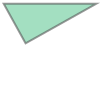

In [61]:
# Access the geometry on the first row of data
data.at[0, "geometry"]

In [62]:
# Print information about the area 
print("Area:", round(data.at[0, "geometry"].area, 0), "square meters")

Area: 76.0 square meters


Iterate over the GeoDataFrame rows using the `iterrows()` function. For each row, print the area of the polygon:

In [63]:
for i, row in data.iterrows():
    area = row['geometry'].area
    print("Area:", round(area, 0), "square meters")

Area: 76.0 square meters
Area: 2652.0 square meters
Area: 3186.0 square meters
Area: 13075.0 square meters
Area: 3981.0 square meters
Area: 5544.0 square meters
Area: 1626.0 square meters
Area: 6833.0 square meters
Area: 5978.0 square meters
Area: 4322.0 square meters
Area: 6707.0 square meters
Area: 4272.0 square meters
Area: 2132.0 square meters
Area: 3280.0 square meters
Area: 5597.0 square meters
Area: 2198.0 square meters
Area: 13199.0 square meters
Area: 2453.0 square meters
Area: 12123.0 square meters
Area: 9359.0 square meters
Area: 3040.0 square meters
Area: 8773.0 square meters
Area: 4536.0 square meters
Area: 3459.0 square meters
Area: 1100.0 square meters
Area: 2925.0 square meters
Area: 9797.0 square meters
Area: 307.0 square meters
Area: 1054.0 square meters
Area: 1606.0 square meters
Area: 442.0 square meters
Area: 3329.0 square meters
Area: 34784.0 square meters
Area: 4126.0 square meters
Area: 1443.0 square meters
Area: 12500.0 square meters
Area: 63240.0 square meters

As you see from here, all pandas methods, such as the `iterrows()` function, are directly available in Geopandas without the need to call pandas separately because Geopandas is an extension for pandas.

In practice, it is not necessary to use the `iterrows()` approach to calculate the area for all features. Geodataframes and geoseries have an attribute area which we can use for accessing the area for each feature at once:

In [64]:
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Length: 4311, dtype: float64

<a id="writingdata"></a>
## Writing data into a shapefile
It is possible to export `GeoDataFrame`s into various data formats using the `to_file()` method. In our case, we want to export subsets of the data into Shapefiles (one file for each feature class).

Let’s first select one class (class number 36200, “Lake water”) from the data as a new `GeoDataFrame`:

In [67]:
# Select a class
selection = data[data["CLASS"]==36200]
selection.head()

,GROUP,CLASS,geometry
4247,64,36200,"POLYGON ((379089.473 6687069.722, 379093.838 6..."
4248,64,36200,"POLYGON ((376732.156 6687178.141, 376731.301 6..."
4249,64,36200,"POLYGON ((377939.741 6684539.678, 377929.192 6..."
4250,64,36200,"POLYGON ((372948.857 6688594.047, 372935.951 6..."
4251,64,36200,"POLYGON ((370900.963 6689201.649, 370890.077 6..."


<Axes: >

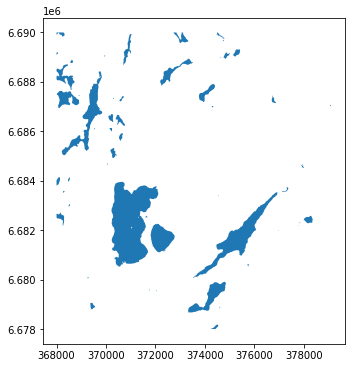

In [68]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
selection.plot(ax=ax)

write this layer into a new Shapefile using the `gpd.to_file()` function:

In [69]:
import os

# Create a output path for the data
output_fp = "created_files/Class_36200.shp"

# Create the  folder if it does not exist
if not os.path.exists('created_files'):
    os.makedirs('created_files')

# Write those rows into a new file (the default output file format is Shapefile)
selection.to_file(output_fp)

/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<a id='sjoins'></a>
## Spatial joins
A **spatial join** uses binary predicates such as `intersects` and `crosses` to combine two `GeoDataFrame`s based on the spatial relationship between their geometries.

A common use case might be a spatial join between a `Point` and a `Polygon` where you want to retain the point geometries and grab the attributes of the intersecting polygons.

![](https://web.natur.cuni.cz/~langhamr/lectures/vtfg1/mapinfo_1/about_gis/Image23.gif)

### Types of spatial joins
Geopandas currently supports the following methods of spatial joins. We refer to the `left_df` and `right_df` which are the correspond to the two dataframes passed in as arguments.

#### Left outer join
In a LEFT OUTER JOIN (`how='left'`), we keep all rows from the left and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right if they intersect and lose right rows that do not intersect. A left outer join implies that we are interested in retaining the geometries of the left.

#### Right outer join
In a RIGHT OUTER JOIN (`how='right'`), we keep all rows from the right and duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the left if they intersect and lose left rows that don’t intersect. A right outer join implies that we are interested in retaining the geometries of the right.

#### Inner join
In an INNER JOIN (`how='inner'`), we keep rows from the right and left only where their binary predicate is `True`. We duplicate them if necessary to represent multiple hits between the two dataframes. We retain attributes of the right and left only if they intersect and lose all rows that do not. An inner join implies that we are interested in retaining the geometries of the left.

![](https://www.golinuxcloud.com/wp-content/uploads/types_joins.png)

In [78]:
%matplotlib inline
from shapely.geometry import Point

In [114]:
# NYC Boros
zippath = gpd.datasets.get_path('nybb')
polydf = gpd.read_file(zippath)
polydf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

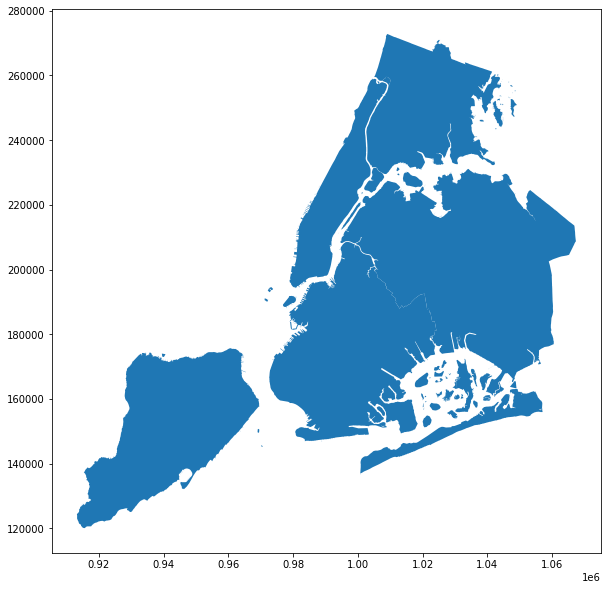

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
polydf.plot(ax = ax)

In [116]:
polydf_lat_lng = polydf.to_crs(epsg=4326)

polydf_lat_lng

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [117]:
polydf.total_bounds
# tuple containing minx, miny, maxx, maxy values 
# for the bounds of the series as a whole.

array([ 913175.10900879,  120121.88125434, 1067382.50842285,
        272844.29364014])

In [118]:
# Generate some points
b = [int(x) for x in polydf.total_bounds]
N = 8
pointdf = gpd.GeoDataFrame([
    {'geometry': Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

# Make sure they're using the same projection reference
pointdf.crs = polydf.crs

In [119]:
pointdf

,geometry,value1,value2
0,POINT (913175.000 120121.000),1033296,793054
1,POINT (932450.000 139211.000),1071661,793239
2,POINT (951725.000 158301.000),1110026,793424
3,POINT (971000.000 177391.000),1148391,793609
4,POINT (990275.000 196481.000),1186756,793794
5,POINT (1009550.000 215571.000),1225121,793979
6,POINT (1028825.000 234661.000),1263486,794164
7,POINT (1048100.000 253751.000),1301851,794349
8,POINT (1067375.000 272841.000),1340216,794534


<Axes: >

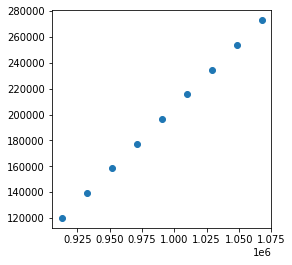

In [120]:
pointdf.plot()

/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


[]

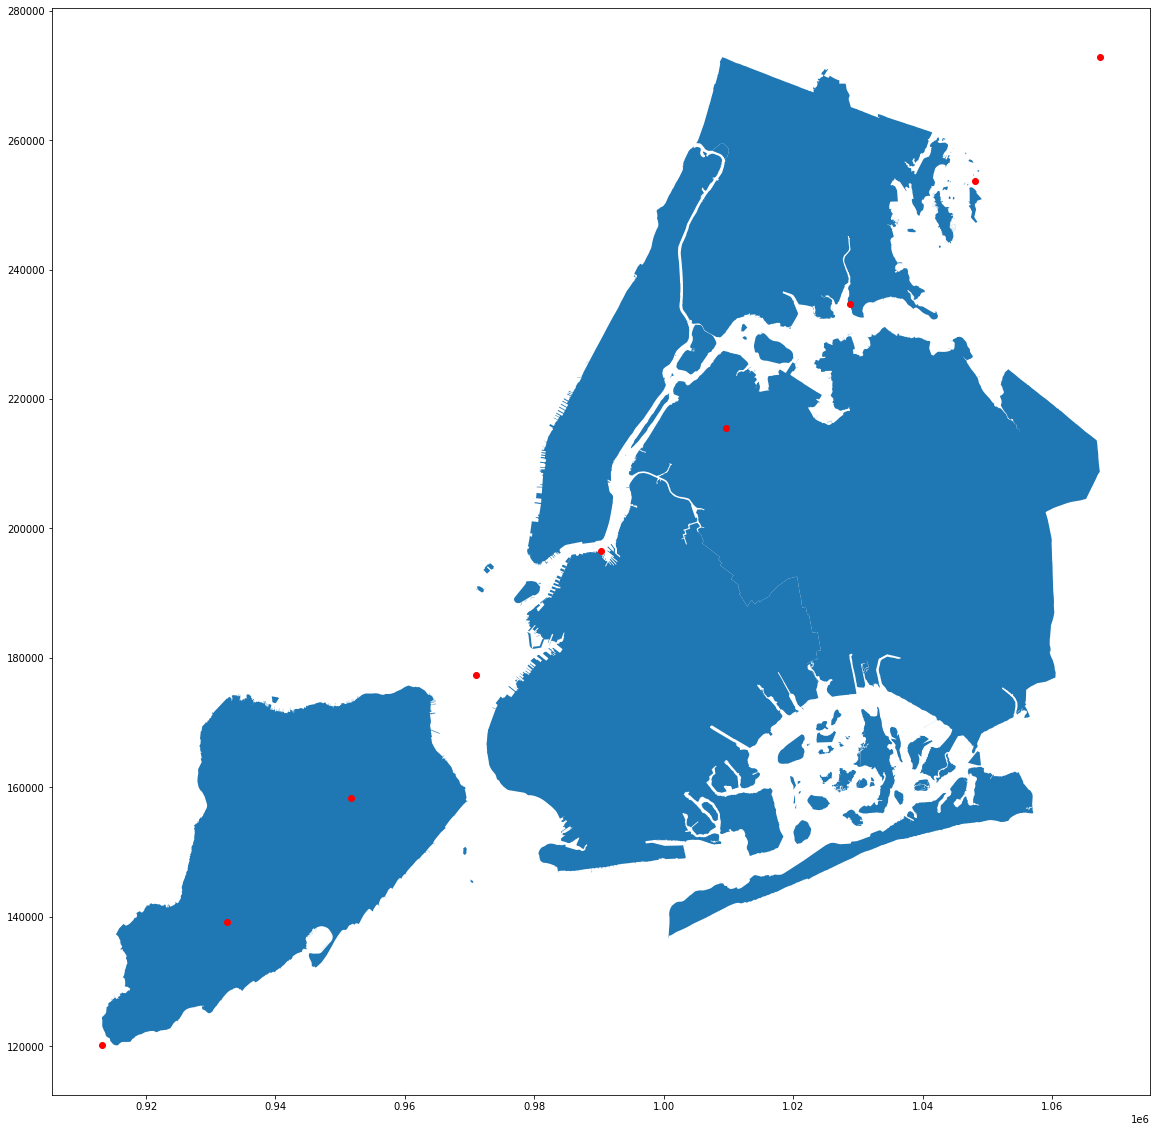

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))

ax = plt.axes()
ax = polydf.plot(ax = ax) 
ax = pointdf.plot(ax=ax, color='r')
ax.plot()

In [122]:
join_left_df = pointdf.sjoin(polydf, how="left")
join_left_df
# Note the NaNs where the point did not intersect a boro
# Note that the default join predicate is 'intersects'

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,POINT (913175.000 120121.000),1033296,793054,NaN,NaN,NaN,NaN,NaN
1,POINT (932450.000 139211.000),1071661,793239,0.0,5.0,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0.0,5.0,Staten Island,330470.010332,1.623820e+09
3,POINT (971000.000 177391.000),1148391,793609,NaN,NaN,NaN,NaN,NaN
4,POINT (990275.000 196481.000),1186756,793794,NaN,NaN,NaN,NaN,NaN
5,POINT (1009550.000 215571.000),1225121,793979,1.0,4.0,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4.0,2.0,Bronx,464392.991824,1.186925e+09
7,POINT (1048100.000 253751.000),1301851,794349,NaN,NaN,NaN,NaN,NaN
8,POINT (1067375.000 272841.000),1340216,794534,NaN,NaN,NaN,NaN,NaN


<Axes: >

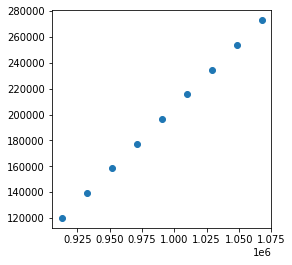

In [130]:
join_left_df.plot()

In [132]:
join_inner_df = pointdf.sjoin(polydf, how="inner")
join_inner_df
# Note the lack of NaNs; dropped anything that didn't intersect

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
1,POINT (932450.000 139211.000),1071661,793239,0,5,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0,5,Staten Island,330470.010332,1.623820e+09
5,POINT (1009550.000 215571.000),1225121,793979,1,4,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4,2,Bronx,464392.991824,1.186925e+09


<Axes: >

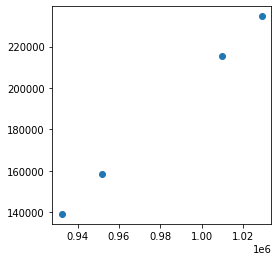

In [133]:
join_inner_df.plot()

We’re not limited to using the `intersection` binary predicate. Any of the Shapely geometry methods that return a Boolean can be used by specifying the op kwarg.

In [134]:
pointdf.sjoin(polydf, how="left", predicate="within")

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,POINT (913175.000 120121.000),1033296,793054,NaN,NaN,NaN,NaN,NaN
1,POINT (932450.000 139211.000),1071661,793239,0.0,5.0,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0.0,5.0,Staten Island,330470.010332,1.623820e+09
3,POINT (971000.000 177391.000),1148391,793609,NaN,NaN,NaN,NaN,NaN
4,POINT (990275.000 196481.000),1186756,793794,NaN,NaN,NaN,NaN,NaN
5,POINT (1009550.000 215571.000),1225121,793979,1.0,4.0,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4.0,2.0,Bronx,464392.991824,1.186925e+09
7,POINT (1048100.000 253751.000),1301851,794349,NaN,NaN,NaN,NaN,NaN
8,POINT (1067375.000 272841.000),1340216,794534,NaN,NaN,NaN,NaN,NaN


# Exercise 1

-Retrieve the shapefile of italian regions

-Retrieve the list of italian regional capitals, with coordinates

-Assign the correct capital to each region

In [156]:
import pandas as pd

capitals_df = pd.read_csv('data/italian_regional_capitals.csv')

# Create a GeoDataFrame
capitals_gdf = gpd.GeoDataFrame(capitals_df,geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

capitals_df.crs = "EPSG:4326"

print(capitals_gdf)

               name  latitude  longitude                 region  \
0              Rome   41.9028    12.4964                  Lazio   
1             Milan   45.4642     9.1900               Lombardy   
2            Naples   40.8518    14.2681               Campania   
3             Turin   45.0703     7.6869               Piedmont   
4           Palermo   38.1157    13.3615                 Sicily   
5           Bologna   44.4949    11.3426         Emilia-Romagna   
6          Florence   43.7696    11.2558                Tuscany   
7             Genoa   44.4056     8.9463                Liguria   
8            Venice   45.4408    12.3155                 Veneto   
9         Catanzaro   38.9041    16.5987               Calabria   
10           Ancona   43.6158    13.5189                 Marche   
11          Trieste   45.6495    13.7768  Friuli Venezia Giulia   
12            Aosta   45.7379     7.3204           Aosta Valley   
13             Bari   41.1171    16.8719                 Apuli

/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

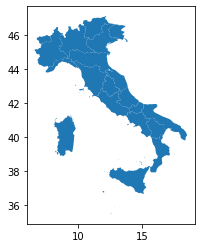

In [157]:
region_gdf = gpd.read_file("data/it.json")

region_gdf.plot()

In [158]:
region_gdf

,source,id,name,geometry
0,https://simplemaps.com,IT23,Valle d'Aosta,"POLYGON ((7.84962 45.93971, 7.85593 45.91932, ..."
1,https://simplemaps.com,IT21,Piedmont,"POLYGON ((7.07537 45.46629, 7.08926 45.47706, ..."
2,https://simplemaps.com,IT42,Liguria,"POLYGON ((7.68793 44.09080, 7.70933 44.09152, ..."
3,https://simplemaps.com,IT25,Lombardy,"POLYGON ((9.20143 44.68213, 9.20593 44.72083, ..."
4,https://simplemaps.com,IT32,Trentino-Alto Adige,"POLYGON ((10.84490 45.83405, 10.82670 45.84123..."
5,https://simplemaps.com,IT34,Veneto,"MULTIPOLYGON (((11.42150 44.94986, 11.41902 44..."
6,https://simplemaps.com,IT36,Friuli Venezia Giulia,"POLYGON ((13.09563 45.65232, 13.08073 45.66507..."
7,https://simplemaps.com,IT52,Tuscany,"MULTIPOLYGON (((10.02846 44.04926, 10.02853 44..."
8,https://simplemaps.com,IT55,Umbria,"MULTIPOLYGON (((11.88902 42.85039, 11.93166 42..."
9,https://simplemaps.com,IT62,Lazio,"MULTIPOLYGON (((11.45150 42.37437, 11.45158 42..."


In [159]:
region_gdf.crs = capitals_gdf.crs

In [160]:
capitals_gdf.sjoin(region_gdf, how="left", predicate="within")

,name_left,latitude,longitude,region,geometry,index_right,source,id,name_right
0,Rome,41.9028,12.4964,Lazio,POINT (12.49640 41.90280),9.0,https://simplemaps.com,IT62,Lazio
1,Milan,45.4642,9.1900,Lombardy,POINT (9.19000 45.46420),3.0,https://simplemaps.com,IT25,Lombardy
2,Naples,40.8518,14.2681,Campania,POINT (14.26810 40.85180),12.0,https://simplemaps.com,IT72,Campania
3,Turin,45.0703,7.6869,Piedmont,POINT (7.68690 45.07030),1.0,https://simplemaps.com,IT21,Piedmont
4,Palermo,38.1157,13.3615,Sicily,POINT (13.36150 38.11570),16.0,https://simplemaps.com,IT82,Sicilia
5,Bologna,44.4949,11.3426,Emilia-Romagna,POINT (11.34260 44.49490),18.0,https://simplemaps.com,IT45,Emilia-Romagna
6,Florence,43.7696,11.2558,Tuscany,POINT (11.25580 43.76960),7.0,https://simplemaps.com,IT52,Tuscany
7,Genoa,44.4056,8.9463,Liguria,POINT (8.94630 44.40560),2.0,https://simplemaps.com,IT42,Liguria
8,Venice,45.4408,12.3155,Veneto,POINT (12.31550 45.44080),NaN,NaN,NaN,NaN
9,Catanzaro,38.9041,16.5987,Calabria,POINT (16.59870 38.90410),15.0,https://simplemaps.com,IT78,Calabria


/Users/giovannimauro/anaconda3/envs/skmob/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


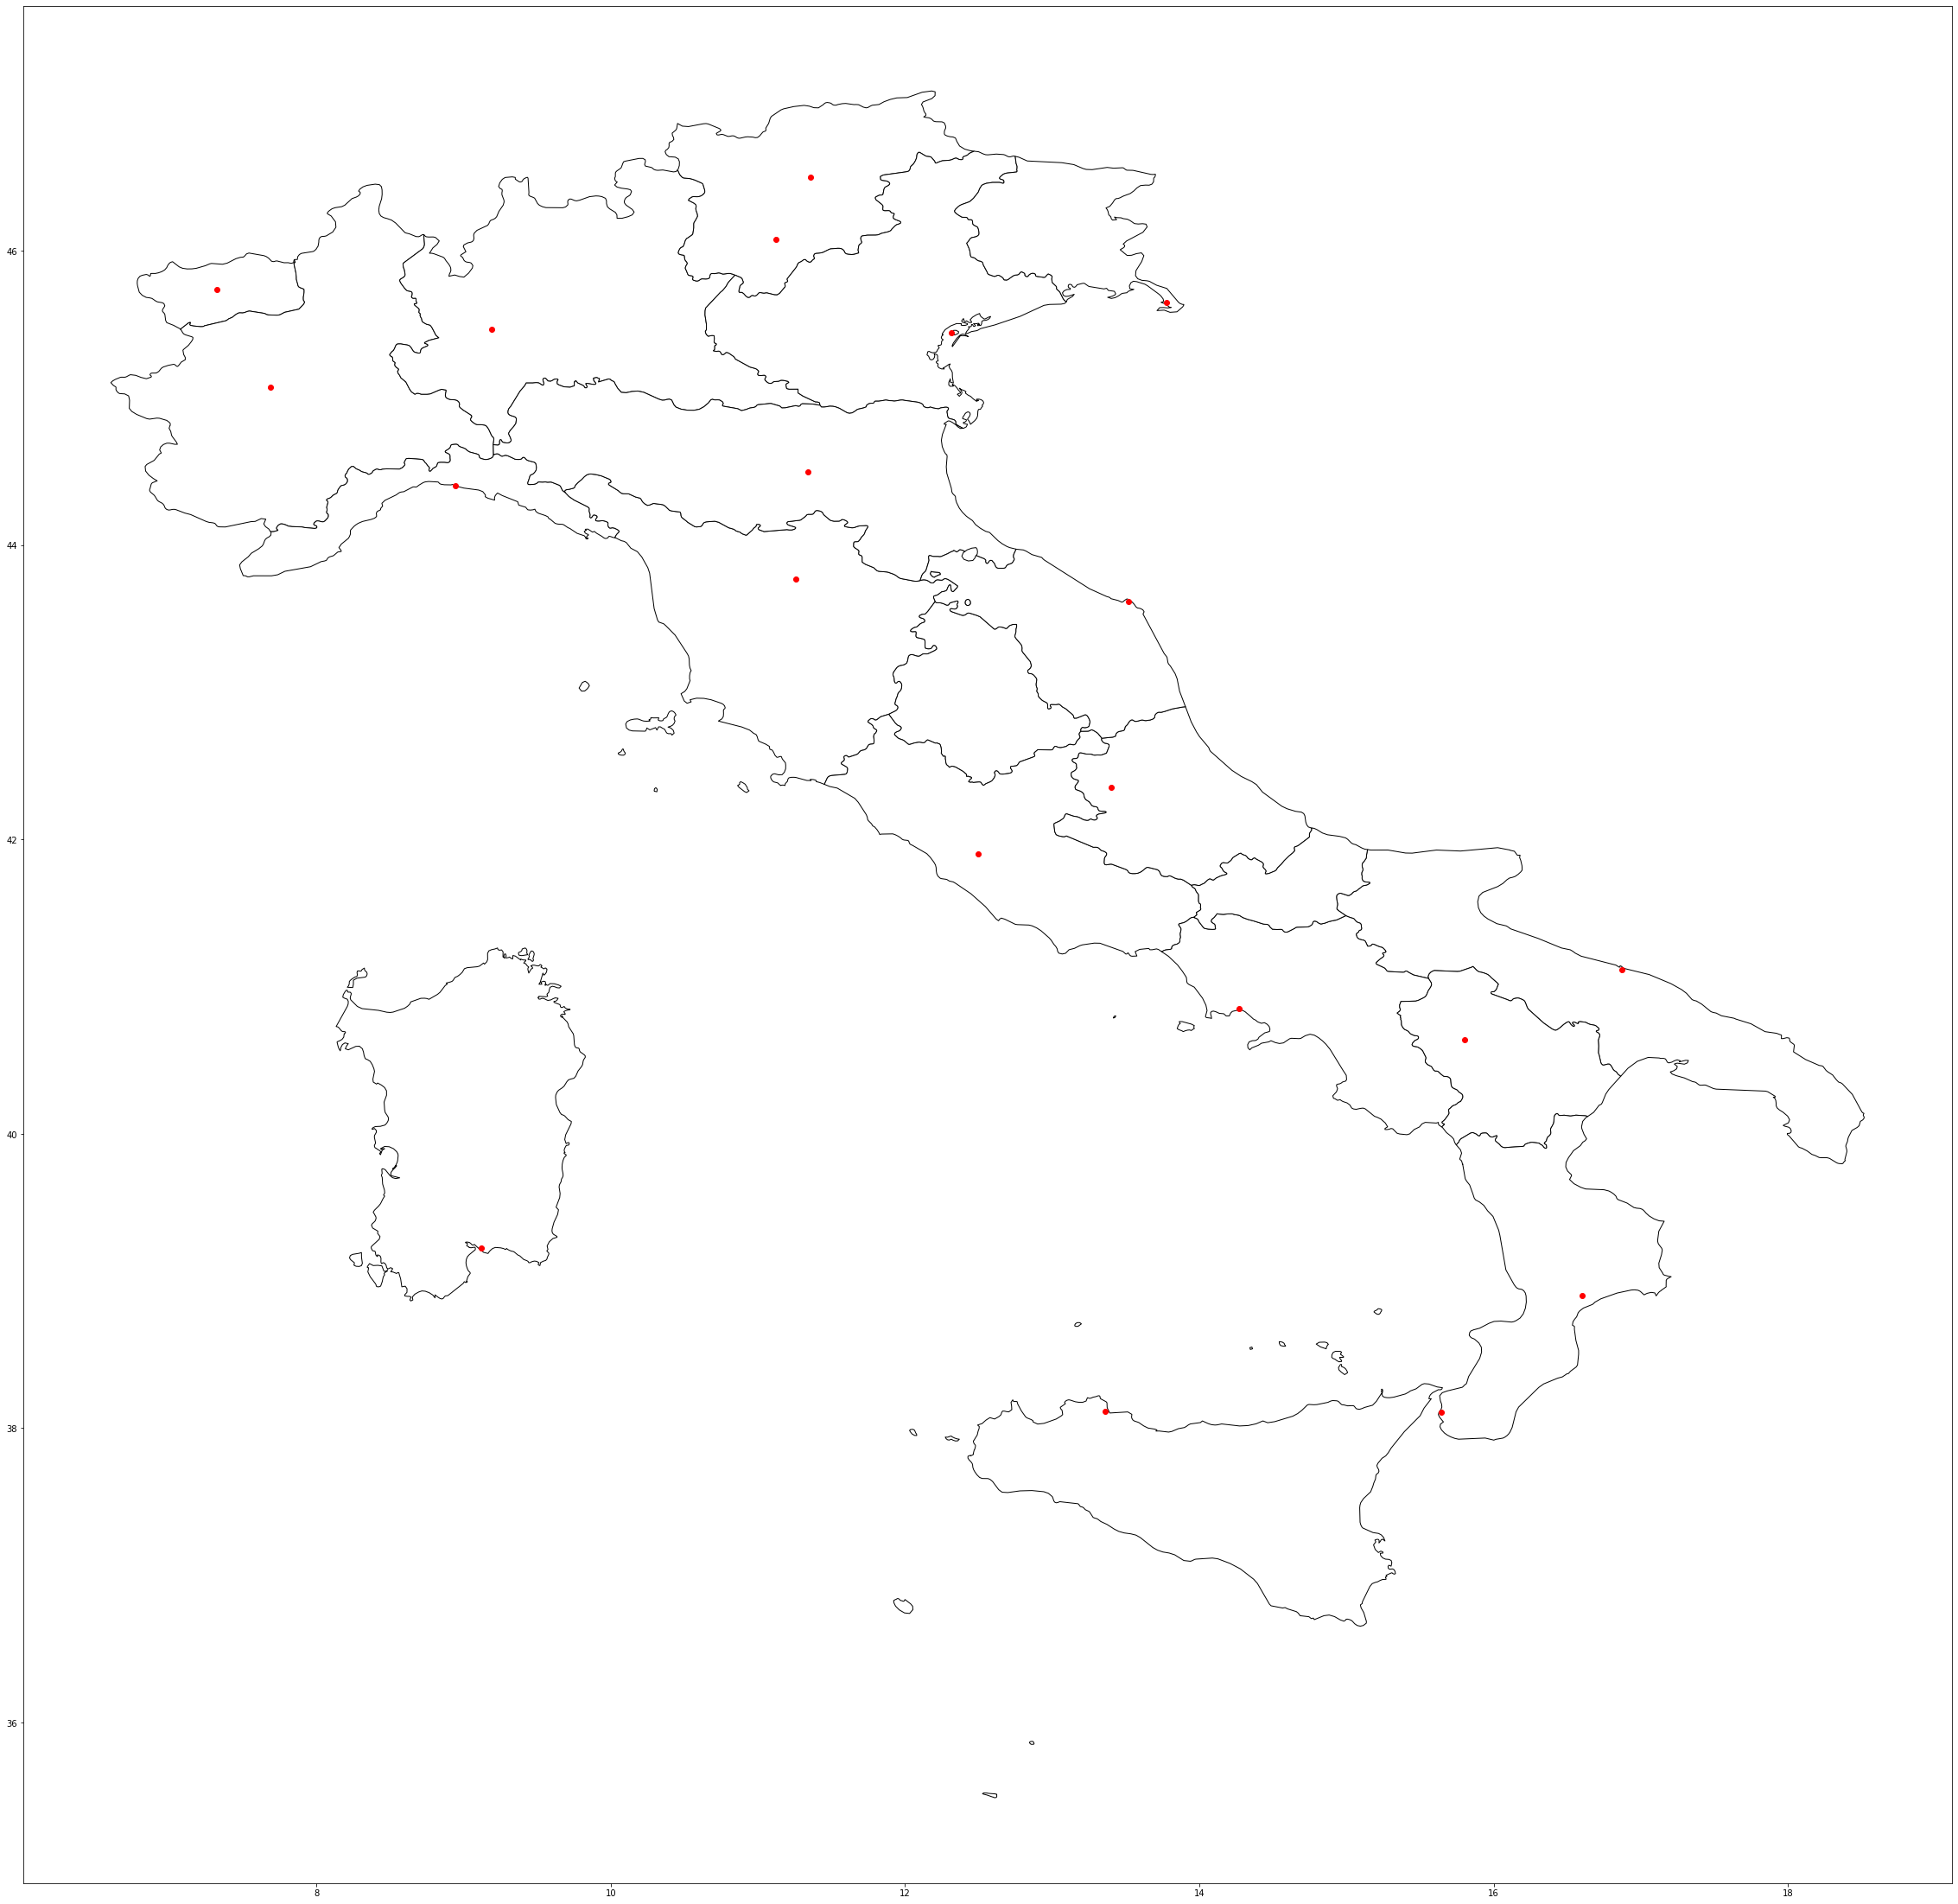

In [162]:
fig, ax = plt.subplots(figsize=(40, 40))

region_gdf.plot(ax=ax, color='white', edgecolor='black')

capitals_gdf.plot(ax=ax, color='red')

plt.show()